In [30]:
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./data/Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


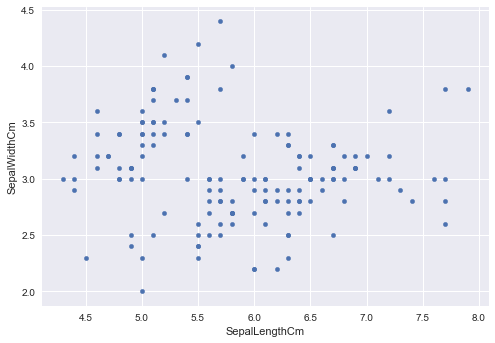

In [6]:
df.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")
plt.show()

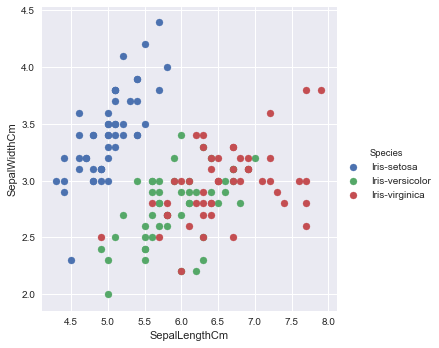

In [7]:
sns.FacetGrid(df, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()
plt.show()

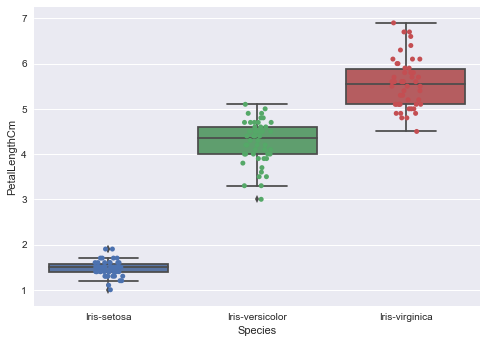

In [9]:
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=df)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=df, jitter=True, edgecolor="gray")
plt.show()

In [10]:
train = df.sample(frac=0.8, random_state=200)
test = df.drop(train.index)

In [20]:
target_col = ['Species']
feature_cols = list(train)
feature_cols.remove(target_col[0])
x_train = train[feature_cols]
y_train = train[target_col]
x_test = test[feature_cols]
y_test = test[target_col]

In [29]:
model = linear_model.LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred = model.predict(x_train)

/Users/stefansokic/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
accuracy_score(y_test, y_pred)

0.96666666666666667